1/1 [==============================] - 0s 49ms/step


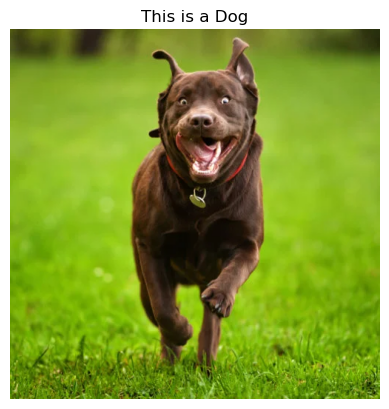

In [25]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model = load_model('model_bigger_app.h5')

# Step 2: Preprocess the new image
# Replace 'path_to_your_image.jpg' with the path to the image you want to classify
image_path = 'doggo.webp'

with Image.open(image_path).convert('RGB') as img:
    # Save the original image for later display
    original_img = img.copy()
    
    # Resize the image to the size your model expects
    img = img.resize((128, 128))
    
    # Convert the image to a NumPy array
    img_array = img_to_array(img)
    
    # Expand dimensions to match the shape the model expects
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image if you did so during training
    img_array /= 255.0

# Step 3: Make the prediction
prediction = model.predict(img_array)

# Interpret the result and label the image
label = "Dog" if prediction[0][0] > 0.5 else "Cat"

# Display the image with the label as the plot title
plt.imshow(original_img)
plt.axis('off')
plt.title(f"This is a {label}")  # Add the classification label as the title
plt.show()
